# Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rc = {
    "font.family": "sans",
    "font.size": 10,
    "axes.axisbelow": True,
    "grid.linestyle": '--',
    "axes.grid": True,
    "mathtext.fontset": "cm",
}

plt.rcParams.update(rc)


In [18]:
from methods import secant, mod_secant


# Data prep

In [19]:
from q_factor import get_q_df


In [20]:
q_values = get_q_df('./data/QVALUES.txt')

q_values.tail()


,i_ref,Q
6,0.6,68.512
7,0.7,84.725
8,0.8,115.720
9,0.9,164.860
10,1.0,314.650


# Numerical methods

## Modified Secant

In [21]:
from q_factor import q_func_polynomial


In [ ]:
test_dict = {
    'a': 0.0,
    'b': 1.0,
    'seek': 40,
    'tol': 1e-6,
    'max_iter': 32
}


In [22]:
a = test_dict['a']
b = test_dict['b']
seek = test_dict['seek']
tol = test_dict['tol']
MAX_ITER = test_dict['max_iter']

x = np.arange(0, 1, 1e-3)
f = q_func_polynomial(x, q_values, deg=12, include_q_drop=False)
y = f(x)

res_sec = secant(a, b, seek, tol, f, MAX_ITER, debug=True)
res_mod = mod_secant(a, b, seek, tol, f, MAX_ITER, debug=True)

print('Basic secant:\n', res_sec.loc[:, [
      'iter', 'x_next', 'f(x_next)', 'error']])
print()
print('Modified secant:\n', res_mod.loc[:, [
      'iter', 'x_next', 'f(x_next)', 'error']])


Basic secant:
    iter    x_next  f(x_next)         error
0     1  0.059228  25.243930 -1.475607e+01
1     2  0.107195  28.351241 -1.164876e+01
2     3  0.287017  37.905935 -2.094065e+00
3     4  0.326428  40.618482  6.184820e-01
4     5  0.317442  39.974220 -2.578031e-02
5     6  0.317802  39.999709 -2.909647e-04
6     7  0.317806  40.000000  1.399914e-07

Modified secant:
    iter    x_next  f(x_next)         error
0     1  0.226505  34.329893 -5.670107e+00
1     2  0.288460  38.000024 -1.999976e+00
2     3  0.322221  40.314995  3.149949e-01
3     4  0.317628  39.987365 -1.263548e-02
4     5  0.317805  39.999927 -7.338207e-05
5     6  0.317806  40.000000  1.729559e-08


/tmp/ipykernel_9499/2973827547.py:8: RankWarning: Polyfit may be poorly conditioned
  f = q_func_polynomial(x, q_values, deg=12, include_q_drop=False)


In [23]:
res_mod


,iter,a,b,f(a),f(b),slope,x_next,f(x_next),error
0,1,0.000000,0.600000,22.709000,68.512000,76.338333,0.226505,34.329893,-5.670107e+00
1,2,0.600000,0.226505,68.512000,34.329893,91.519538,0.288460,38.000024,-1.999976e+00
2,3,0.226505,0.288460,34.329893,38.000024,59.238501,0.322221,40.314995,3.149949e-01
3,4,0.288460,0.322221,38.000024,40.314995,68.568524,0.317628,39.987365,-1.263548e-02
4,5,0.322221,0.317628,40.314995,39.987365,71.319033,0.317805,39.999927,-7.338207e-05
5,6,0.317628,0.317805,39.987365,39.999927,70.904840,0.317806,40.000000,1.729559e-08


In [24]:
from analyses import *


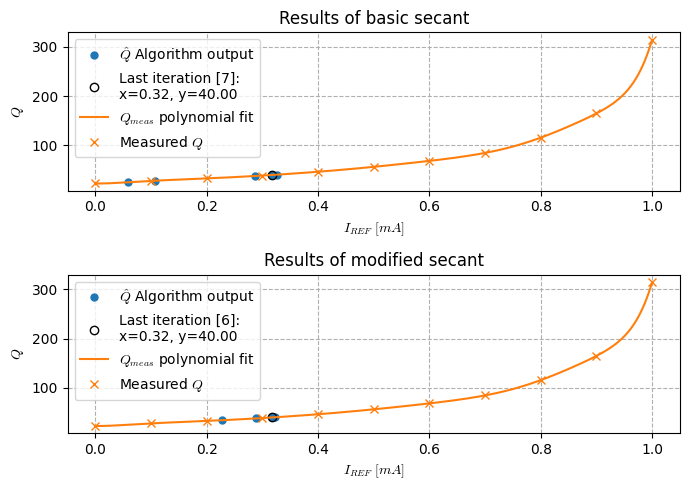

In [25]:
fig, ax = plt.subplots(nrows=2, figsize=(7, 5))

ax[0].plot(res_sec['x_next'], res_sec['f(x_next)'], 'o',
           label='$\hat{Q}$ Algorithm output', markersize=5)

ax[1].plot(res_mod['x_next'], res_mod['f(x_next)'], 'o',
           label='$\hat{Q}$ Algorithm output', markersize=5)

q_x = res_sec.iloc[-1, 6]
q_y = res_sec.iloc[-1, 7]
last_iter = res_sec.iloc[-1, 0]

ax[0].plot(q_x, q_y, 'o',
           label=f'Last iteration [{last_iter}]:\nx={q_x:.2f}, y={q_y:.2f}',
           c='k', fillstyle='none',)

q_x = res_mod.iloc[-1, 6]
q_y = res_mod.iloc[-1, 7]
last_iter = res_mod.iloc[-1, 0]

ax[1].plot(q_x, q_y, 'o',
           label=f'Last iteration [{last_iter}]:\nx={q_x:.2f}, y={q_y:.2f}',
           c='k', fillstyle='none',)

ax[0].set_title('Results of basic secant')
ax[1].set_title('Results of modified secant')

for ax in ax:
    ax.plot(x, y, label='$Q_{meas}$ polynomial fit')
    ax.plot(q_values['i_ref'], q_values['Q'],
            'x', c='C1', label='Measured $Q$')
    ax.legend()
    ax.set(xlabel='$I_{REF}\; [mA]$', ylabel='$Q$')

fig.tight_layout()
plt.show()


In [26]:
x0 = 0.0
x1 = 1.0
multiple_seeks = np.arange(25, 300, 20)
tol = 10
MAX_ITER = 32

x = np.arange(0, 1, 1e-3)
f = q_func_polynomial(x, q_values, include_q_drop=False)
y = f(x)

m_seeks_records = []
for seek in multiple_seeks:
    m_seeks_dict = dict()

    res_sec = secant(x0, x1, seek, tol, f, MAX_ITER, debug=True)
    m_seeks_dict['Method'] = 'basic'
    m_seeks_dict['Seek'] = seek
    m_seeks_dict['Iters-to-converge'] = res_sec['iter'].iat[-1]
    m_seeks_dict['x_next'] = res_sec['x_next'].iat[-1]
    m_seeks_dict['f(x_next)'] = res_sec['f(x_next)'].iat[-1]

    m_seeks_records.append(m_seeks_dict)

    m_seeks_dict = dict()

    res_mod = mod_secant(x0, x1, seek, tol, f, MAX_ITER, debug=True)
    m_seeks_dict['Method'] = 'modified'
    m_seeks_dict['Seek'] = seek
    m_seeks_dict['Iters-to-converge'] = res_mod['iter'].iat[-1]
    m_seeks_dict['x_next'] = res_mod['x_next'].iat[-1]
    m_seeks_dict['f(x_next)'] = res_mod['f(x_next)'].iat[-1]

    m_seeks_records.append(m_seeks_dict)

m_seeks_df = pd.DataFrame(m_seeks_records)
m_seeks_df.tail(4)


,Method,Seek,Iters-to-converge,x_next,f(x_next)
24,basic,265,4,0.974223,262.109049
25,modified,265,2,0.973082,260.078478
26,basic,285,3,0.989250,290.962818
27,modified,285,2,0.985354,283.092180


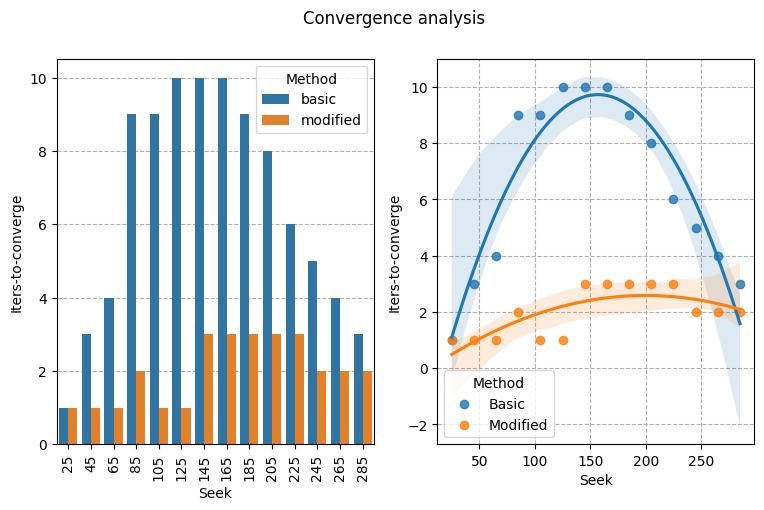

In [27]:
fig, ax = plt.subplots(figsize=(9, 5), ncols=2)

basic = m_seeks_df[m_seeks_df['Method'] == 'basic']
modif = m_seeks_df[m_seeks_df['Method'] == 'modified']

sns.barplot(data=m_seeks_df,
            y='Iters-to-converge',
            x='Seek',
            hue='Method',
            orient='v',
            ax=ax[0])

ax[0].set_xticklabels(rotation=90, labels=basic['Seek'])

sns.regplot(data=basic, x='Seek', y='Iters-to-converge',
            ax=ax[1], order=2, label='Basic')
sns.regplot(data=modif, x='Seek', y='Iters-to-converge',
            ax=ax[1], order=2, label='Modified')

ax[1].legend(title='Method')

fig.suptitle('Convergence analysis')


plt.show()


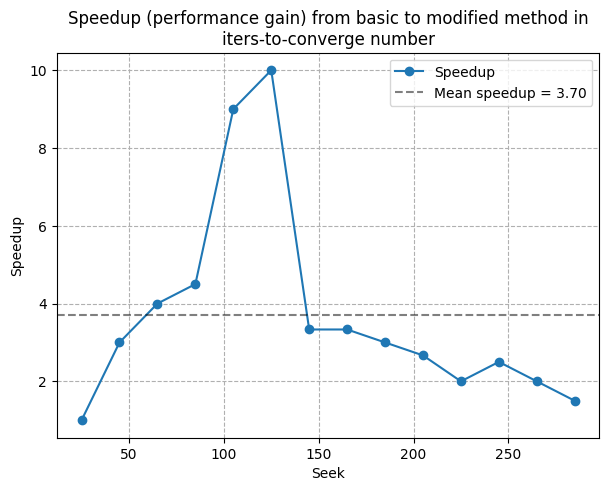

In [28]:
speedup = basic['Iters-to-converge'].values / modif['Iters-to-converge'].values

mean_speedup = np.mean(speedup)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(basic['Seek'], speedup, '-o', label='Speedup')
ax.axhline(mean_speedup, ls='--', c='k', alpha=0.5,
           label=f'Mean speedup = {mean_speedup:.2f}')


ax.set(
    xlabel='Seek',
    ylabel='Speedup',
    title='Speedup (performance gain) from basic to modified method in\niters-to-converge number'
)

ax.legend()
plt.show()


## Bisection

In [29]:
from methods import bisection


In [30]:
a = 0.0
b = 0.7
seek = 50
tol = 1e-6
MAX_ITER = 64

x = np.arange(0, 1, 1e-3)
f = q_func_polynomial(x, q_values, deg=12, include_q_drop=True)
y = f(x)

res_bisection = bisection(a, b, seek, tol, f, MAX_ITER, debug=True)

res_bisection


/tmp/ipykernel_9499/2512531541.py:8: RankWarning: Polyfit may be poorly conditioned
  f = q_func_polynomial(x, q_values, deg=12,include_q_drop=True)


,iter,a,b,c,f(c),error
0,1,0.000000,0.700000,0.350000,42.596922,-7.403078e+00
1,2,0.350000,0.700000,0.525000,59.500904,9.500904e+00
2,3,0.350000,0.525000,0.437500,49.757687,-2.423129e-01
3,4,0.437500,0.525000,0.481250,54.289619,4.289619e+00
4,5,0.437500,0.481250,0.459375,51.919067,1.919067e+00
5,6,0.437500,0.459375,0.448437,50.811946,8.119463e-01
6,7,0.437500,0.448437,0.442969,50.278315,2.783149e-01
7,8,0.437500,0.442969,0.440234,50.016397,1.639713e-02
8,9,0.437500,0.440234,0.438867,49.886644,-1.133557e-01
9,10,0.438867,0.440234,0.439551,49.951421,-4.857912e-02


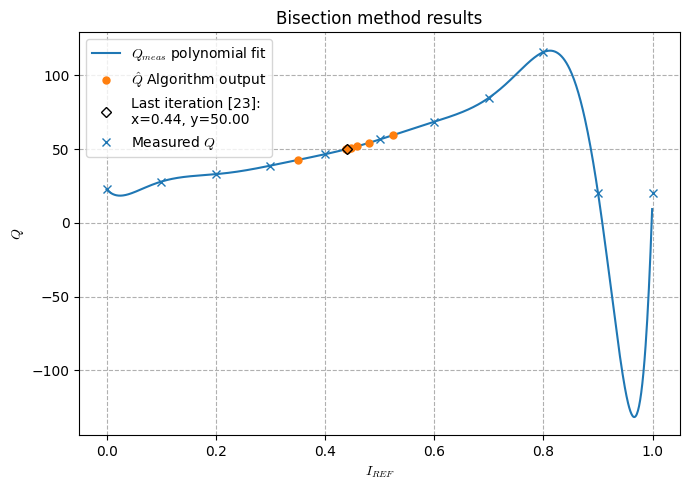

In [31]:
fig, ax = plt.subplots(nrows=1, figsize=(7, 5))

ax.plot(x, y, label='$Q_{meas}$ polynomial fit')
ax.plot(res_bisection['c'], res_bisection['f(c)'], 'o',
        label='$\hat{Q}$ Algorithm output', markersize=5)

q_x = res_bisection.iloc[-1, -3]
q_y = res_bisection.iloc[-1, -2]
last_iter = res_bisection.iloc[-1, 0]

ax.plot(q_x, q_y, 'D',
        label=f'Last iteration [{last_iter}]:\nx={q_x:.2f}, y={q_y:.2f}',
        c='k', fillstyle='none', markersize=5)

ax.plot(q_values['i_ref'], q_values['Q'], 'x', c='C0', label='Measured $Q$')

ax.legend()
ax.set(xlabel='$I_{REF}$', ylabel='$Q$', title='Bisection method results')


# a = res_bisection['a']
# b = res_bisection['b']
# c = res_bisection['c']

# ax.plot(a, np.zeros_like(a), 'o', b, np.zeros_like(b), 'x', c, np.zeros_like(c), '+')

fig.tight_layout()
plt.show()


In [32]:
x0 = 0.0
x1 = 1.0
multiple_seeks = np.arange(25, 300, 20)
tol = 10
MAX_ITER = 32

x = np.arange(0, 1, 1e-3)
f = q_func_polynomial(x, q_values, include_q_drop=False)
y = f(x)

m_seeks_records = []
for seek in multiple_seeks:
    m_seeks_dict = dict()

    res_sec = secant(x0, x1, seek, tol, f, MAX_ITER, debug=True)
    m_seeks_dict['Method'] = 'basic'
    m_seeks_dict['Seek'] = seek
    m_seeks_dict['Iters-to-converge'] = res_sec['iter'].iat[-1]
    m_seeks_dict['x_next'] = res_sec['x_next'].iat[-1]
    m_seeks_dict['f(x_next)'] = res_sec['f(x_next)'].iat[-1]

    m_seeks_records.append(m_seeks_dict)

    m_seeks_dict = dict()

    res_mod = mod_secant(x0, x1, seek, tol, f, MAX_ITER, debug=True)
    m_seeks_dict['Method'] = 'modified'
    m_seeks_dict['Seek'] = seek
    m_seeks_dict['Iters-to-converge'] = res_mod['iter'].iat[-1]
    m_seeks_dict['x_next'] = res_mod['x_next'].iat[-1]
    m_seeks_dict['f(x_next)'] = res_mod['f(x_next)'].iat[-1]

    m_seeks_records.append(m_seeks_dict)

m_seeks_df = pd.DataFrame(m_seeks_records)
m_seeks_df.tail(4)


,Method,Seek,Iters-to-converge,x_next,f(x_next)
24,basic,265,12,1.098306,2.565397e+02
25,modified,265,32,-3.869185,1.868075e+08
26,basic,285,13,1.104189,2.874537e+02
27,modified,285,32,17.321807,6.444391e+11
